## The Big Comparison of RSC Space Alignments

This notebook does the analysis of the output of `full_RSC_pairup.py`.
In `full_RSC_pairup.py`, all 27 embedding spaces were paired up (only earlier-with-later pairs, so 351 pairs in total) and for each pair, couplings of size 1K were computed over the most frequent _shared_ words. 

Each space pair has 4 sets of statistics on translation pairs, one each obtained from a coupling with...
- [uniform, none] uniform probability distributions and raw coupling scores
- [uniform, csls] uniform probability distributions and csls-normalized coupling scores
- [custom, None]  log-flattened frequency-based prob. dists. and raw coupling scores
- [custom, csls]  log-flattened frequency-based prob. dists. and csls-normalized coupling scores

In [44]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from default import RSC_YEARS

distribs = "uniform" # or: "custom"
share_vocs = "share" # or: "share"

statsfile = "uniform_share_statistics" # set this correctly!

stats_filepath = "outputs/full_RSC_pairup/"+statsfile  
visuals_dir = "visuals/full_RSC_pairup/"



In [45]:
only_looking_at_distances = False

if not only_looking_at_distances:
    df = pd.read_csv(stats_filepath, sep='\t', header=0)
    # add the percentage of matches among found pairs scaled by the fraction of pairs found
    if share_vocs == "nonshare":
        df["performance"] = (df["matches"]/df["voc_overlap"])
    else:
        df["performance"] = (df["matches"]/df["pairs"]) * (df["pairs"]/1000)

else:
    # for the gw distances heatmap
    df = pd.read_csv(stats_filepath, sep='\t', header=0)

    df["gw_distance"] = df["gw_distance"]*100

    df_selection = df # for convenience later on

df

,year1,year2,distribs,adjust_param,pairs,matches,mismatches,mu_matches,med_matches,mu_mismatches,med_mismatches,performance
0,1660,1670,uniform,None,1000,1000,0,0.996573,0.999994,NaN,NaN,1.000
1,1660,1680,uniform,None,1000,1000,0,0.986554,0.999849,NaN,NaN,1.000
2,1670,1680,uniform,None,1000,1000,0,0.997366,0.999997,NaN,NaN,1.000
3,1660,1690,uniform,None,777,8,769,0.368292,0.313387,0.499253,0.500252,0.008
4,1670,1690,uniform,None,999,998,1,0.991564,0.999916,0.478952,0.478952,0.998
...,...,...,...,...,...,...,...,...,...,...,...,...
346,1870,1920,uniform,None,986,972,14,0.951637,0.998958,0.377014,0.333740,0.972
347,1880,1920,uniform,None,990,975,15,0.958618,0.999511,0.318642,0.307963,0.975
348,1890,1920,uniform,None,992,976,16,0.958632,0.999651,0.379096,0.360714,0.976
349,1900,1920,uniform,None,991,981,10,0.961278,0.999807,0.340183,0.297741,0.981


In [46]:
""" originally made 4 different data frames for individual analysis """
#distribs = "custom"
distribs = "uniform"

df_selection = df[ (df["distribs"]==distribs)]

In [47]:
df_selection

,year1,year2,distribs,adjust_param,pairs,matches,mismatches,mu_matches,med_matches,mu_mismatches,med_mismatches,performance
0,1660,1670,uniform,None,1000,1000,0,0.996573,0.999994,NaN,NaN,1.000
1,1660,1680,uniform,None,1000,1000,0,0.986554,0.999849,NaN,NaN,1.000
2,1670,1680,uniform,None,1000,1000,0,0.997366,0.999997,NaN,NaN,1.000
3,1660,1690,uniform,None,777,8,769,0.368292,0.313387,0.499253,0.500252,0.008
4,1670,1690,uniform,None,999,998,1,0.991564,0.999916,0.478952,0.478952,0.998
...,...,...,...,...,...,...,...,...,...,...,...,...
346,1870,1920,uniform,None,986,972,14,0.951637,0.998958,0.377014,0.333740,0.972
347,1880,1920,uniform,None,990,975,15,0.958618,0.999511,0.318642,0.307963,0.975
348,1890,1920,uniform,None,992,976,16,0.958632,0.999651,0.379096,0.360714,0.976
349,1900,1920,uniform,None,991,981,10,0.961278,0.999807,0.340183,0.297741,0.981


In [48]:
def heatmapdata(dataframe):
    # transcribe the performance values into a rectangular table
    htmp = np.zeros((len(RSC_YEARS), len(RSC_YEARS)))

    for i in range(htmp.shape[0]):
        for j in range(htmp.shape[1]):
            if i == j:
                htmp[i,j] = 0
            else:
                
                condition = (dataframe['year1'] == RSC_YEARS[i]) & (dataframe['year2'] == RSC_YEARS[j])
                
                if not only_looking_at_distances:
                    """ for string matches """
                    value = dataframe[condition]["performance"].values
                    """ for vocabulary overlap """
                    #value = dataframe[condition]["voc_overlap"].values/1000
                else:
                    """ for gw_distances """
                    value = dataframe[condition]["gw_distance"].values

                if value.shape == (0,):
                    htmp[i,j] = 0
                else:
                    htmp[i,j] = value[0]
                    
    return htmp


In [49]:
datamat = heatmapdata(df_selection)

#data_selection = np.ones(datamat.T.shape) - datamat.T # x is the source year and y is the target year
data_selection = datamat.T
data_selection.max()

1.0

In [54]:
vmin = 0.8 #data_selection.min()
vmax = 1.0 #data_selection.max()
center = vmin+((vmax-vmin)/2)
xticklabels = 1
yticklabels = 1

mask = np.zeros_like(data_selection)
mask[np.triu_indices_from(mask)] = 3

index = RSC_YEARS
columns = RSC_YEARS

figsize = (10,8)

[Text(69.0, 0.5, 'target year'), Text(0.5, 51.0, 'source year')]

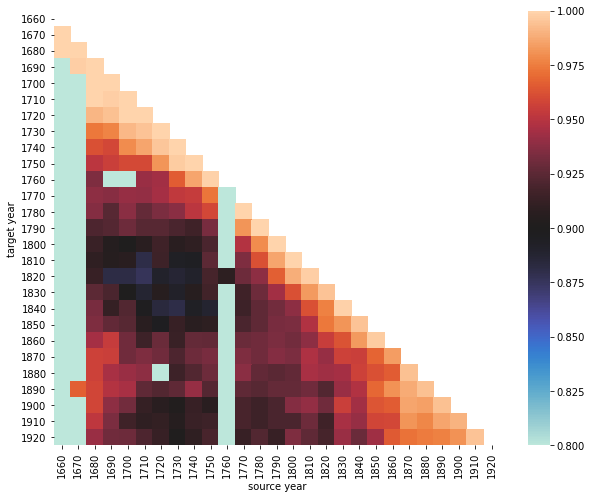

In [55]:
plt.figure(figsize=figsize)

htmp = sns.heatmap(DataFrame(data = data_selection, 
                             index = index, 
                             columns = columns), 
                   mask=mask,
                   vmin = vmin, vmax = vmax, 
                   center=center,
                   #cmap="from_list",
                   xticklabels=xticklabels, yticklabels=yticklabels,
                   #annot=True,
                   )
htmp.set(xlabel='source year', ylabel='target year')

#htmp.figure.savefig(visuals_dir+"htmp_"+distribs+"_"+share_vocs+"_gwdist.png", dpi=200)